Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6445 - accuracy: 0.8355 - val_loss: 0.3562 - val_accuracy: 0.9030
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3388 - accuracy: 0.9044 - val_loss: 0.2941 - val_accurac

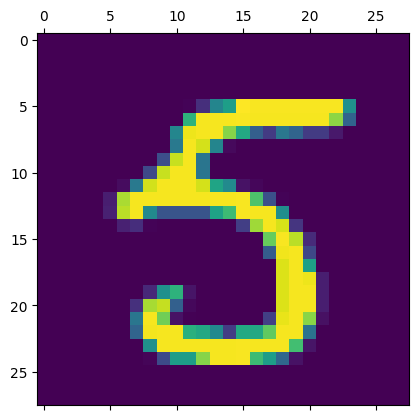

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 5


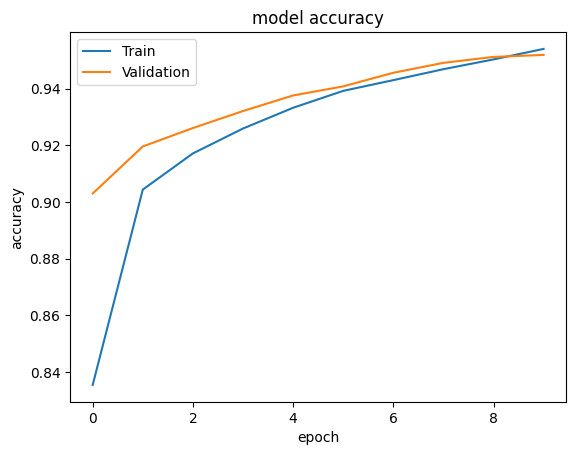

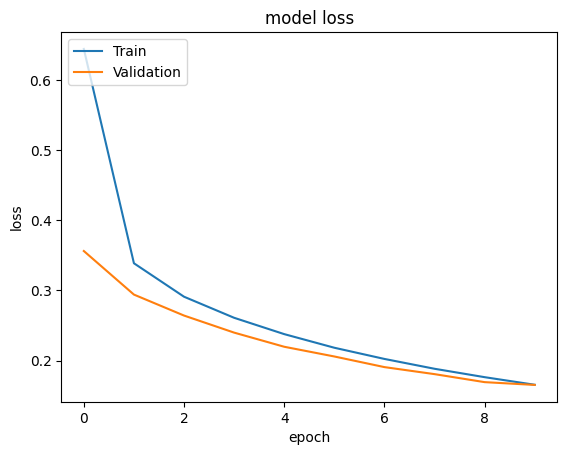

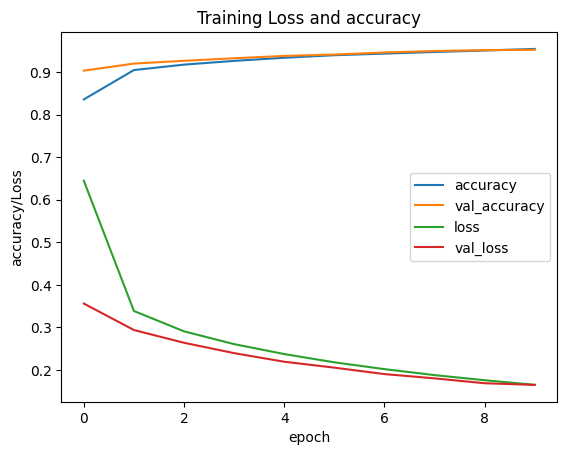

In [3]:

# # Title of Assignment-2:
#     Implementing Feedforward neural networks with Keras and TensorFlow
#     a. Import the necessary packages
#     b. Load the training and testing data (MNIST)
#     c. Define the network architecture using Keras
#     d. Train the model using SGD
#     e. Evaluate the network
#     f. Plot the training loss and accuracy
#
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
get_ipython().run_line_magic('matplotlib', 'inline')
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
len(x_train)
len(x_test)
x_train.shape
x_test.shape
x_train[0]
plt.matshow(x_train[0])
x_train = x_train / 255
x_test = x_test / 255
x_train[0]
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))
get_ipython().run_line_magic('pinfo2', 'history.history')
history.history.keys()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()
keras_model_path='sample_data'
model.save(keras_model_path)
restored_keras_model = tf.keras.models.load_model(keras_model_path)